In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:

import tensorflow as tf
import tensorflow.keras as keras

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

In [4]:
from google.colab import files          #Upload diabetes.csv from the "Deep Learning" folder of the course 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
diabetes = pd.read_csv('diabetes.csv')

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
X = diabetes.iloc[:, 0:-1]
Y = diabetes.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state= 1234, stratify= Y)

#Define the Keras Model

In [10]:
model = Sequential()

In [11]:
model.add( Dense(24, 
                input_shape=(8,),
                activation='relu',
                kernel_initializer='RandomNormal')   )

In [12]:
model.add( Dense(12, 
                activation='relu',
                kernel_initializer='RandomNormal')   )

In [13]:
model.add( Dense(1, 
                activation='sigmoid',
                kernel_initializer='RandomNormal')   )

In [14]:
model.summary()  
#See the number of parameters: 
#first layer (8*24 weights + 24 biases = 216)
#second layer (24*12 weights + 12 biases = 300)
#third layer (12*1 weights + 1 biases = 13)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


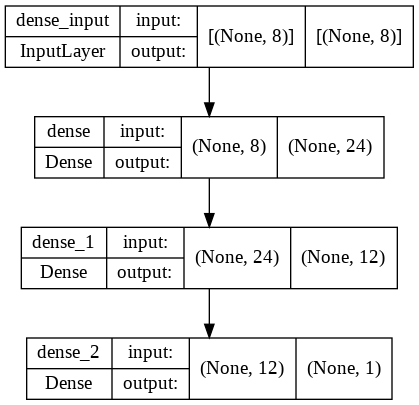

In [15]:
#import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
#from IPython.display import Image
#%matplotlib inline

plot_model(model, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')


#Compile the model

In [ ]:
# adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)   #edit adam parameters
model.compile( optimizer= 'adam',
               loss= 'binary_crossentropy',
               metrics= ['accuracy'])

model.fit(X_train, Y_train, epochs=160, batch_size=200) #Mini_Batch implementation, running 160 times

dict_keys(['loss', 'accuracy'])


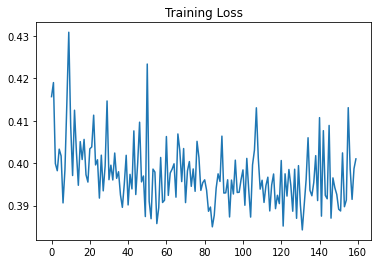

In [24]:
# Plot history

print(model.history.history.keys())


plt.plot(model.history.history['loss'])
plt.title('Training Loss')

plt.show()



In [ ]:
Y_predict = model.predict_classes (X_test)
Y_pred_prob = model.predict(X_test)

print('probability of the 11th case to be positive is' , Y_pred_prob[11]  )
print('case 11th is being predicted to be:', Y_predict[11] )

ERROR! Session/line number was not unique in database. History logging moved to new session 60
probability of the 11th case to be positive is [0.14934167]
case 11th is being predicted to be: [0]


#Evaluate Accuracy

In [ ]:
accuracy_test = model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7532


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[77, 23],
       [15, 39]])

AUC train:  0.8690070093457944


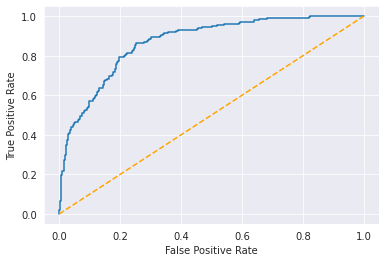

In [ ]:
# Calculate outputs in test set
from sklearn.metrics import roc_curve, auc

prob_test = model.predict(X_test)
prob_train = model.predict(X_train)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('AUC train: ', roc_auc)

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')  # 50% line
plt.show()
